# Clustering

## Variantes de K-Means

### G-Means

G-Means realiza una aproximación jerárquica para encontrar el número de grupos de forma automática. Comprueba si los datos cercanos a los centroides son Gaussianos. Si no es el caso, dicho clúster se divide en dos.

Referencias:
- Greg Hamerly, Charles Elkan. [Learning the k in k-means](https://proceedings.neurips.cc/paper/2003/file/234833147b97bb6aed53a8f4f1c7a7d8-Paper.pdf)
- BigML. [Divining the 'K' in K-means clustering](https://blog.bigml.com/2015/02/24/divining-the-k-in-k-means-clustering/)
- Algoritmo implementado en pyclustering: [gmeans](https://pyclustering.github.io/docs/0.9.2/html/d8/d3c/classpyclustering_1_1cluster_1_1gmeans_1_1gmeans.html)

### K-Medians

Es una variante de K-Means menos sensible a valores extremos. En lugar de centroides, que son la media de las observaciones de un cluster, se calcula la mediana.

pyclustering: [kmedians](https://pyclustering.github.io/docs/0.10.1/html/df/d68/classpyclustering_1_1cluster_1_1kmedians_1_1kmedians.html#details)

### K-Medoids

K-Means es un algoritmo apropiado cuando la elección de la distancia Euclidea es apropiada, ya que no podemos usar medidas de distancias arbitrarias. Esto requiere que todas las variables sean cuantitativas. Además las distancias Euclideas ponen el foco en las distancias más grandes, haciendo que el algoritmo sea muy sensible a valores extremos.

K-Means se puede generalizar para usar distancias arbitrarias. La principal desventaja es que escala de forma cuadrática en lugar de lineal.

Métricas de distancia disponibles: [pairwise_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)    
pyclustering: [kmedoids](https://pyclustering.github.io/docs/0.10.1/html/d0/dd3/classpyclustering_1_1cluster_1_1kmedoids_1_1kmedoids.html#details)     
scikit-learn-extra: [KMedoids](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html)

### K-Modes y K-Prototypes

K-Modes es un algoritmo de clustering que se puede usar con variables categóricas. La distancia usada es el número de valores que concuerdan entre ambos vectores (0 si son iguales y 1 si son distintos). K-Prototypes es una extensión que permite mezclar variables categóricas y variables numéricas.

Ambos están implementados en la librería [kmodes](https://pypi.org/project/kmodes/), con una API compatible con scikit-learn

#### Ejercicio 1

En este ejercicio vamos a usar datos de una encuesta a estudiantes de ciencias políticas, donde se cuantifican los parecidos entre paises (fichero `countries.csv`). Por tanto, en este ejemplo ya tenemos las distancias calculadas y no se puede usar el algoritmo K-Means directamente.

1. Instalar la librería `scikit-learn-extra`

2. Agrupar los distintos paises usando K-Medoids

#### Ejercicio 2

Realizar un análisis de clústering usando los datos `100-Sales-Records.csv`, que contienen los registros de ventas de distintos paises

1. Instalar la librería `kmodes`

2. Cargar los datos

3. Ver el tipo de cada una de las variables (numéricas o categóricas)

4. Usar K-Means, K-Modes o K-Prototypes según sea necesario

## Clustering jerárquico

El clustering jerárquico es una familia de algoritmos que construyen agrupaciones anidadas juntando observaciones o dividiéndolas de forma sucesiva. Esta jerarquia se suele representar como un árbol (dendograma). Para obtener una única agrupación final es necesario seleccionar un punto de corte en este árbol, que representa el número final de grupos.

Existen dos estrategias principales para realizar un clustering jerárquico:

- *Bottom-up* (**aglomerativo**): cada observación empieza en su propio clúster, y se van agrupando sucesivamente los clústers más similares
- *Top-down* (**divisivo**): se comienza con un único clúster y se va dividiendo en varios de acuerdo con las observaciones menos parecidas

En ambos casos, cada nivel representa una agrupación distinta en grupos disjuntos, y el usuario tiene que decidir en que nivel quiere "cortar" para obtener la agrupación final.

Más información sobre clustering jerárquico: [Hierarchical cluster analysis](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf)

### Ejemplo dendograma

El conjunto de datos usado en este ejemplo contiene los arrestos por 100,000 habitantes de distintos crímenes para los 50 estados de EEUU en 1973. También se proporciona el porcentaje de población viviendo en áreas urbanas ([fuente](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests)). Muestra de los datos:

In [1]:
import pandas as pd

arrests = pd.read_csv("../data/USArrests.csv", index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


El resultado del clustering jerárquico se puede representar con un dendograma:

![](../img/usaarrests_dendogram.png)

![](../img/usaarrests_dendogram_4.png)

Cada una de las hojas del dendograma representa una de las 50 observaciones (en este ejemplo estados). A medida que subimos en el árbol, las observaciones se juntan en ramas. Esto se corresponde con observaciones que son similares entre si. 

Si seguimos moviéndonos hacia arriba, las ramas se juntan con otras ramas u hojas. Cuanto antes ocurra esta fusión, más parecidos serán los grupos de observaciones. Por el contrario, observaciones que se juntan cerca de la raiz del árbol son más diferentes entre si. La altura de la fusión, que se representa en el eje y, indica como de diferentes son dos observaciones.

En cuanto al eje x, existen múltiples ordenaciones que representan la misma agrupación. Por tanto, la proximidad de las observaciones en este eje no proporciona ninguna información.

Fuente: [RPubs. Hierarchical Clustering](https://rpubs.com/badz11/542883)

### Clustering aglomerativo

El algoritmo es relativamente sencillo. Necesitamos:

1. $n$ observaciones (cada observación empieza siendo su propio clúster)

2. una medida de distancia (es habitual usar la distancia Euclidea)

Repetir para $k = n, ..., 2$

1. Calcular las distancias intra-clúster para todos los pares de agrupaciones

2. Agrupar el par de clústeres con la distancia más baja en uno solo. La distancia entre estos dos grupos indica la altura en el dendograma

En la primera iteración, cuando las agrupaciones tienen una única observación, es sencillo calcular la distancia Euclidea de todos los pares posibles. Sin embargo, a medida que avanza el algoritmo, necesitamos calcular la distancia entre **grupos de observaciones**, que se conoce como *linkage* (enlace). Para ello, las 5 posibilidades más comunes son:

 - **Single**: Distancia entre grupos mínima. Calcular todas las distancias entre las observaciones de clúster A y del clúster B y usar la distancia mínima
 - **Complete**: Distancia entre grupos máxima. Calcular todas las distancias entre las observaciones de clúster A y del clúster B y usar la distancia máxima
 - **Average**: Distancia entre grupos media. Calcular todas las distancias entre las observaciones de clúster A y del clúster B y usar la distancia media
 - **Centroid**: distancia entre el centroide del clúster A y el centroide del clúster B
 - **Ward**: intenta minimizar la varianza de los grupos a unir. Definimos la suma de cuadrados (SS) de un clúster como la suma de las distancias al cuadrado de todas las observaciones a la media (centroide). Para los grupos A y B calculamos la suma de cuadrados de agrupar ambos clústers ($\text{SS}_{AB}$) y de los clústeres de forma individual ($\text{SS}_{A}$ y $\text{SS}_{B}$). En cada paso se agrupan los clústeres donde esta diferencia sea mínima: $$\text{SS}_{AB} - (\text{SS}_{A} + \text{SS}_{B})$$ 

<img src="../img/hierarchical_clustering.png" alt="Illustration of algorithm" style="width: 800px;"/>

Fuente: [An Introduction to Statistical Learning](https://www.statlearning.com/)

#### Comparación distintos tipos de enlace

En la siguiente imágen (An Introduction to Statistical Learning, pp. 528), se puede ver una comparativa de algunos de los tipos de enlaces. En general el enlace *single* produce agrupaciones "alargadas", mientras que *complete* o *average* producen agrupaciones más equilibradas.


<img src="../img/linkage_comparison.png" alt="Linkage comparison" style="width: 800px;"/>

En este otro ejemplo de la librería [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py) podemos ver como el método de Ward suele ser el más efectivo con datos ruidosos:

<img src="../img/linkage_comparison_1.png" alt="Linkage comparison" style="width: 800px;"/>


#### Cuestiones prácticas

##### Elección de distancia

La distancia Euclídea es la elección por defecto pero en ocasiones puede ser apropiado usar otro tipo de distancias, por ejemplo basadas en correlaciones. En ese caso nos estamos centrando más en la forma de las observaciones en lugar de en sus magnitudes, es decir, dos observaciones son parecidas si tienen perfiles similares.

Vamos a ver un ejemplo donde las observaciones representan compradores y las variables items comprados en un supermercado, la distancia Euclidea agrupará compradores con pocas compras en general (observaciones 1 y 3). Sin embargo, con otro tipo de distancias como la correlación estaríamos agrupando clientes con perfiles similares, como las observaciones 1 y 2.

<img src="../img/hierarchical_distances.png" alt="Illustration of algorithm" style="width: 600px;"/>

Además de la elección de distancia, al igual que en otros tipos de clustering, hay que decidir si estandarizar o no las variables. Continuando con este ejemplo, hay items que se compran con mucha más frecuencia que otros, y por tanto van a tener un mayor efecto en las distancias.

De la misma forma, si las variables están en distintas escalas (cm y m) también suele ser recomendable estandarizar.

Fuente: Introduction to Statistical Learning pp. 529

##### Nuevos datos

Al contrario que K-Means, el clustering jerárquico no permite asignar nuevos datos a sus clústeres correspondientes. Por tanto, habría que repetir el análisis con todos los datos (antiguos y nuevos). Un potencial riesgo de repetir el análisis es que las etiquetas podrían cambiar sustancialmente. 

Una posible solución es ajustar un clasificador sobre las etiquetas generadas por el clustering sobre los datos originales y aplicar ese clasificador a los nuevos datos. Un ejemplo se puede ver en la [documentación](https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py).

#### Librerías

`scikit-learn` implementa clústering jerárquico aglomerativo en la clase [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Cuenta con los enlaces *sinlge*, *complete*, *average* y *ward* y acepta distintas funciones de distancia:

 - `"euclidean"`
 - `"l1"`
 - `"l2"`
 - `"manhattan"`
 - `"cosine"`

In [2]:
from sklearn.cluster import AgglomerativeClustering

arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
ac = AgglomerativeClustering(compute_full_tree=True, compute_distances=True, distance_threshold=0, n_clusters=None)

In [4]:
ac.fit(arrests)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, n_clusters=None)

In [5]:
ac.distances_

array([  2.29128785,   3.8340579 ,   3.92937654,   6.23698645,
         6.63777071,   7.35527022,   8.0274529 ,   8.53756406,
        11.45643924,  11.6511802 ,  11.71110584,  12.08994072,
        12.61427762,  13.04492238,  13.29736816,  13.8960426 ,
        14.23024947,  14.3259671 ,  14.50103445,  15.4544492 ,
        15.94636845,  16.82617009,  17.34435547,  19.50760535,
        19.62213036,  21.16719159,  21.76809592,  22.48721859,
        22.81081615,  24.29855963,  25.60761605,  26.4159043 ,
        30.05888665,  33.43214521,  34.34537815,  38.49367913,
        38.52791196,  42.45452469,  43.36297521,  44.80839207,
        50.3351198 ,  65.99783113,  69.34970114,  82.29444088,
       106.29226554, 141.13374154, 162.69994468, 352.78364165,
       700.87860195])

Existen dos problemas con esta implementación:
 
  1. No es directo realizar el dendograma
  
  2. No están disponibles todos los tipos de enlaces
  
La librería `scipy` cuenta con una implementación alternativa que cuenta con bastantes más funciones de enlace ([`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)), así como una función para realizar los dendogramas ([`scipy.cluster.hierarchy.dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html))

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [7]:
Z = linkage(arrests, 'ward')

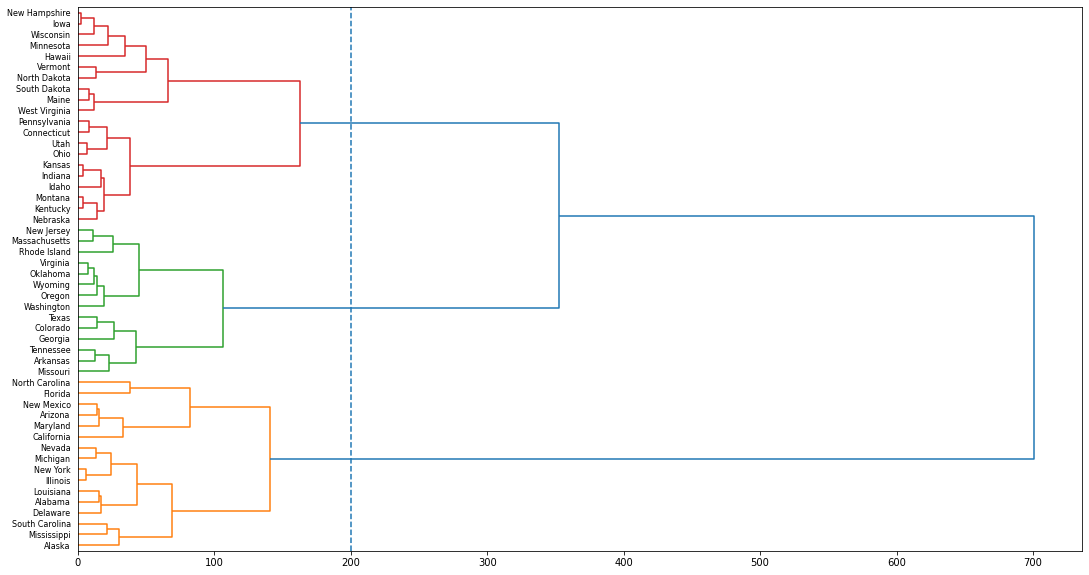

In [8]:
fig = plt.figure(figsize=(18, 10))
dn = dendrogram(Z, labels=arrests.index, orientation="right", color_threshold=200)
plt.axvline(x=200, linestyle="dashed");

Como se puede ver en el ejemplo, `scipy` devuelve una matriz de enlace Z (más detalles del formato [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)). Es posible calcular esta matriz a partir de la información contenida en el modelo de `scikit-learn`, de forma que se puede realizar el clustering usando esa librería y a continuación realizar el gráfico con `scipy`. Esto es útil para aprovecharse de todo el ecosistema de `scikit`, por ejemplo el módulo de preproceso para estandarizar los datos.

Esta función está modificada a partir del ejemplo de la [documentación](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py):

In [9]:
import numpy as np

def linkage_matrix(model, **kwargs):
    # Create linkage matrix

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    return linkage_matrix

lm = linkage_matrix(ac)

In [10]:
np.testing.assert_array_equal(Z, lm)

#### Ejercicios

El aprendizaje no supervisado se usa con frecuencia para analizar datos de genes. Vamos a realizar un ejercicio con los datos NCI60, que contienen 6830 expresiones de genes de 64 tipos de cáncer distintos. El objetivo es agrupar los distintos tipos de cáncer según los que tienen expresiones similares de sus genes.

1. Cargar los datos `nci60.csv`

2. Realizar un clustering jerárquico para agrupar los distintos tipos de cáncer (no usar la columna `label`). ¿Es necesario estandarizar las variables?

3. Probar con distintos tipos de enlace

4. Comprobar si los distintos tipos de cáncer, contenidos en la columna `label` aparecen en los mismos grupos

4. Comparar los resultados para 4 clusters con el algoritmo K-Means

#### Funciones de distancias propias

Existen dos formas de usar funciones de distancias no implementadas en `scikit-learn` con la clase `AgglomerativeClustering` (y en general con otros tipos de clustering que aceptan medidas de distancias arbitrarias, como K-Medoids):

 - Crear una función propia que calcule las distancias y usar `affinity=mi_distancia`

 - Usar `affinity="precomputed"` y pasar la matriz de distancias al método `fit()`
 
Vamos a ver un ejemplo:

In [31]:
from sklearn.metrics import pairwise_distances

def corr_dist(x1, x2):
    return 1-np.corrcoef(x1, x2)[0, 1]

def corr_affinity(X):
    return pairwise_distances(X, metric=corr_dist)

ac = AgglomerativeClustering(n_clusters=4, affinity=corr_affinity, linkage="average")
labels1 = ac.fit_predict(arrests)

Segunda opción:

In [32]:
arrests_dist = corr_affinity(arrests)
arrests_dist

array([[0.        , 0.00907498, 0.00143016, ..., 0.03240251, 0.41246734,
        0.01088461],
       [0.00907498, 0.        , 0.01030379, ..., 0.06510028, 0.48941215,
        0.03250546],
       [0.00143016, 0.01030379, 0.        , ..., 0.02446101, 0.38150312,
        0.00638416],
       ...,
       [0.03240251, 0.06510028, 0.02446101, ..., 0.        , 0.2275928 ,
        0.00592639],
       [0.41246734, 0.48941215, 0.38150312, ..., 0.2275928 , 0.        ,
        0.2998325 ],
       [0.01088461, 0.03250546, 0.00638416, ..., 0.00592639, 0.2998325 ,
        0.        ]])

In [29]:
arrests_dist.shape

(50, 50)

In [36]:
ac = AgglomerativeClustering(n_clusters=4, affinity="precomputed", linkage="average")
labels2 = ac.fit_predict(arrests_dist)

In [35]:
(labels1 == labels2).all()

True

Esto se puede usar para realizar clustering de variables numéricas y categóricas sin necesidad de codificar estas últimas como variables numéricas. Un ejemplo de este tipo de distancias es la distancia de [Gower](https://pypi.org/project/gower/)

Referencia: [Distances with Mixed-Type Variables, some Modified Gower’s Coefficients](https://arxiv.org/ftp/arxiv/papers/2101/2101.02481.pdf)

## Clustering basado en densidades

### DBSCAN y OPTICS

DBSCAN define los clústeres como áreas de alta densidad separadas por areas de baja densidad. Esta definición es muy genérica, por lo que los grupos pueden tener cualquier forma, al contrario que K-Means, que asume que los clústeres son convexos.

El concepto más importante de este algoritmo es el de muestra *core*, que son muestras en areas de alta densidad. Un clúster contiene:

 - muestras *core*, cercanas entre si de acuerdo a una cierta medida de distancia
 - muestras *no-core*, cercanas a la muestras core pero no son *core* en si mismas
 
El algoritmo cuenta con dos parámetros principales que definen el concepto de **denso**:

 - `min_samples`: número de muestras en la cercania de un punto para considerar que ese punto es una muestra *core*
 
 - `eps`: distancia mínima entre dos muestras para considerarlas muestras cercanas
 
Más formalmente, una muestra es *core* si existen `min_samples` muestras a una distancia de `eps`. Es decir, muestras que están en areas de alta densidad. 

El algoritmo funciona de forma recursiva, buscando una muestra *core* y comprobando si los vecinos de esta muestra *core* son a su vez muestras *core*. Muestras que están a una distancia `eps` de alguna muestra *core* pero no tienen `min_samples` vecinos también pertenecen al cluster, mientras que muestras que están a más de una distancia `eps` no pertenecen a ningún clúster.

![](../img/plot_dbscan.png)

#### Selección de parámetros

DBSCAN no necesita especificar de antemano el número de clústeres, pero si `min_samples` y `eps`. Este último depende además de la medida de distancia utilizada:

- `min_samples`: controla como de tolerante es el algoritmo con respecto al ruido. Si el dataset tiene muchas observaciones hay que incrementar su valor

- `eps`: es un parámetro muy importante que hay que elegir de forma apropiada. Si es demasiado pequeño la mayor parte de los datos no van a pertenecer a ningún clúster, mientras que si es demasiado grande todos los datos se agruparán en un único clúster

Existen algunas referencias que sugieren heurísticas para seleccionar estos parámetros. Un ejemplo es la fórmula `min_samples = 2*d`, donde `d` es el número de variables de los datos.

Las heurísticas para `eps` son un poco más complicadas, pero existen algunas alternativas:

- **Comprobar el resultado del clustering**: en general DBSCAN debería de encontrar entre 1-30% de datos ruidosos (ni asignados a ningún clúster). Si el resultado de la agrupación devuelve un porcentage mucho mayor entonces deberíamos probar a incrementar el valor de `eps`. De la misma forma, un único clúster no debería de contener más del 50% de los datos. Si ese ese es el caso y DBSCAN devuelve pocos clústers muy grandes podemos probar a disminuir el valor de `eps`.

- **OPTICS**: elimina la necesidad del parámetro `eps` ejecutando DBSCAN con un rango de valores. Se pueden recuperar los resultados de DBSCAN para un `eps` arbitrario, pero también se puede usar para seleccionar de forma automática el valor de `eps`

- Heurística tipo **"elbow"**:

  1. Para cada observación, calcular la distancia de sus `min_samples` observaciones más cercanas
  
  2. Ordenar las distancias de menor a mayor
  
  3. Representar las distancias en el eje y y los índices de las muestras en el eje x
  
  4. Seleccionar la distancia que se corresponde con el "codo" en el gráfico

Referencia: [DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN](https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf)

In [90]:
from sklearn.neighbors import NearestNeighbors

min_samples = 2

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(arrests)
distances, indices = nn.kneighbors(arrests)

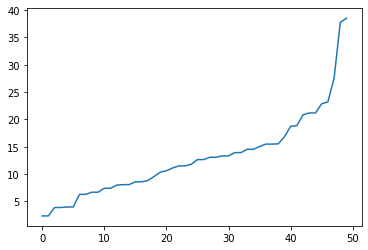

In [91]:
plt.plot(np.sort(distances[:,1], axis=0));

In [93]:
from sklearn.cluster import DBSCAN

db = DBSCAN(min_samples=min_samples, eps=20)
db.fit(arrests)

DBSCAN(eps=20, min_samples=2)

In [94]:
db.labels_

array([ 0, -1,  1,  2, -1,  3,  4,  0, -1, -1, -1,  4,  0,  4,  5,  4,  4,
        0,  5,  1,  2,  0,  5, -1,  2,  4,  4,  0,  5,  2,  1,  0, -1,  5,
        4,  2,  2,  4,  2, -1,  5,  2,  3,  4,  5,  2,  2,  5,  5,  2])

In [96]:
pd.Series(db.labels_).value_counts()

 2    11
 4    10
 5     9
-1     8
 0     7
 1     3
 3     2
dtype: int64

In [98]:
from sklearn.cluster import OPTICS

opt = OPTICS(min_samples=min_samples)
opt.fit(arrests)
pd.Series(opt.labels_).value_counts()

-1     9
 7     5
 4     4
 14    3
 5     3
 6     3
 13    3
 0     2
 15    2
 12    2
 8     2
 10    2
 9     2
 1     2
 3     2
 2     2
 11    2
dtype: int64

## Mezcla de Gaussianas

Los modelos de mezclas de Gaussianas ([Gaussian Mixtures](https://scikit-learn.org/stable/modules/mixture.html)) se pueden ver como una versión "suave" de K-Means. Las principales ventajas son las siguientes:

- Puede agrupar los datos en clústeres no esféricos

- Devuelve una probabilidad de pertenencia a cada clúster

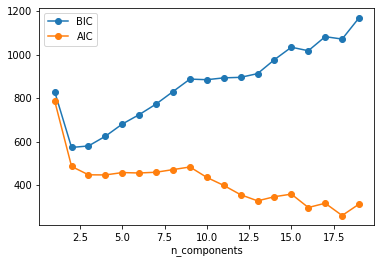

In [110]:
from sklearn.mixture import GaussianMixture

iris = pd.read_csv("../data/iris.csv")
X = iris.drop(columns="variety")

n_components = range(1, 20)
bic_list = []
aic_list = []
for k in n_components:
    gm = GaussianMixture(k, covariance_type='full', random_state=0)
    gm.fit(X)
    bic_list.append(gm.bic(X))
    aic_list.append(gm.aic(X))
    
plt.plot(n_components, bic_list, "o-", label='BIC')
plt.plot(n_components, aic_list, "o-", label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Otros algoritmos de clustering

El siguiente ejemplo de la documentación de [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) muestra las características de los distintos algoritmos de clustering implementados en la librería. En cada algoritmo se han ajustado los parámetros para obtener buenos resultados:

![](../img/cluster_comparison.png)

#### Ejercicio

Realiza un análisis de clustering sobre los datos de clientes `marketing_campaing.csv`. La descripción de las variables se puede encontrar [aquí](https://www.kaggle.com/imakash3011/customer-personality-analysis)

Probar con distintos algoritmos de clustering: DBSCAN, K-Means, OPTICS y comparar sus agrupaciones

### Reducción de dimensionalidad + clustering

Aunque es controvertido, en ocasiones puede ser útil reducir la dimensionalidad de los datos originales y aplicar clustering con los datos transformados. Esta es la aproximación que siguen algunos algoritmos como [Spectral Clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Existen distintas técnicas no supervisadas, pero las más populares son:

- Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))
- t-distributed Stochastic Neighbor Embedding ([t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html))
- Uniform Manifold Approximation & Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/index.html))

A la hora de aplicar técnicas como t-SNE y UMAP hay que tener mucho cuidado, ya que no preservan las distancias ni la densidad originales. Por tanto cualquier algoritmo de clustering que se base en ese tipo de métricas puede obtener resultados erróneos. Además estas técncias de reducción de dimensionalidad pueden crear artefactos.

En general dichas técnicas suelen ser más útiles para realizar visualizaciones.

Más información en este hilo de [Cross-Validated](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

Referencias: [A Tutorial on Spectral Clustering](https://arxiv.org/pdf/0711.0189.pdf)